In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [85]:
df = pd.read_csv("./results/results.csv")
df.head(5)

,cpu_architecture,cpu_core_count,cpu_model_name,cpu_clock_speed_(MHz),total_DRAM_(GB),storage_read_count,storage_write_count,storage_read_bytes,storage_write_bytes,storage_devices,...,distance_metric,query_size,peak_dram_(MB),peak_WSS_(MB),index,index_type,dtype,latency_(s),recall1,recall2
0,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,94685,14502,1762719744,1032019968,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,10,142.808594,142.808594,deep10K_96D_float32.annoy,annoy,float32,0.051110,0.600,0.6
1,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,94685,14502,1762719744,1032019968,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,10,143.023438,143.023438,deep10K_96D_float32.annoy,annoy,float32,0.032435,0.640,0.7
2,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,94685,14502,1762719744,1032019968,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,10,143.132812,143.132812,deep10K_96D_float32.annoy,annoy,float32,0.038918,0.790,0.9
3,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,94685,14502,1762719744,1032019968,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,10,143.164062,143.164062,deep10K_96D_float32.annoy,annoy,float32,0.038879,0.803,0.9
4,x86_64,12,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz,2592.008,13.6535,94685,14502,1762719744,1032019968,"[{'Name': 'sda', 'Type': 'disk', 'Size': '388....",...,L2,20,143.171875,143.171875,deep10K_96D_float32.annoy,annoy,float32,0.035230,0.500,0.5


In [86]:
df['throughput'] = df['query_size'] / df['latency_(s)']
k_values = df['k'].unique()

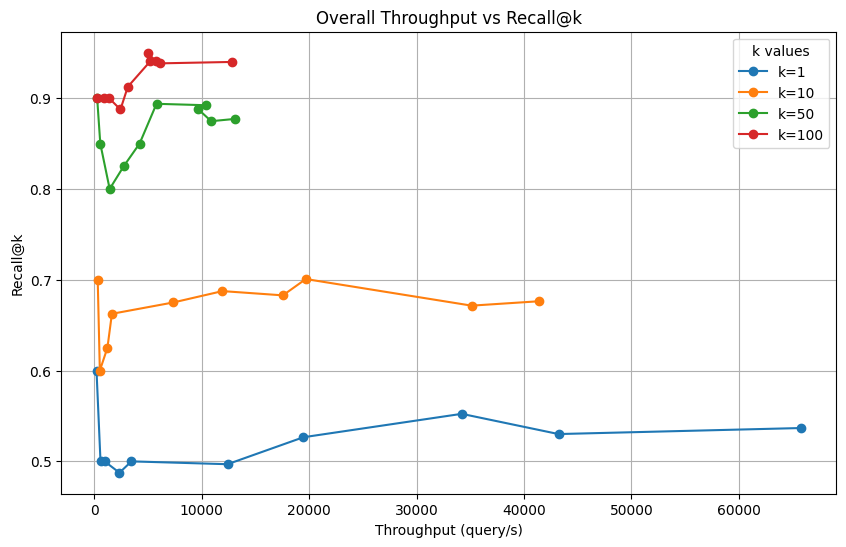

In [87]:
plt.figure(figsize=(10, 6))

for k in k_values:
    subset = df[df['k'] == k]
    plt.plot(subset['throughput'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
plt.title('Overall Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

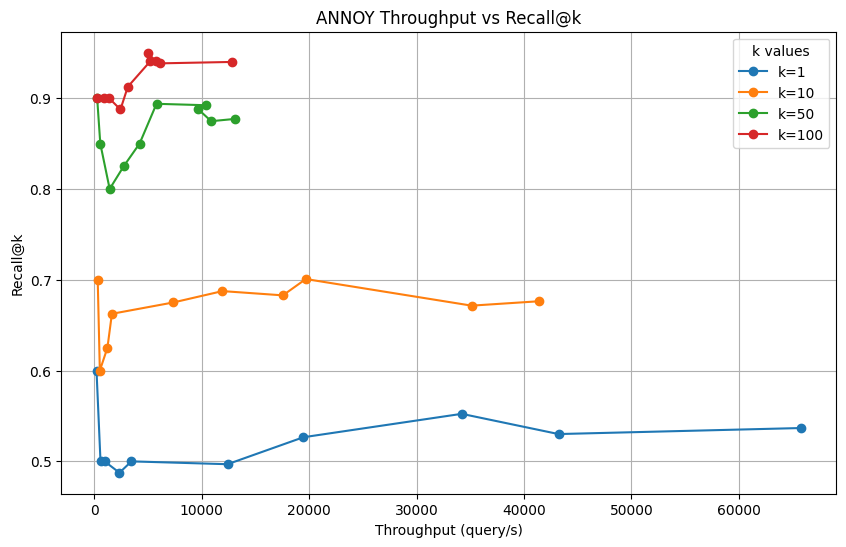

In [88]:
plt.figure(figsize=(10, 6))

for k in k_values:
    annoy = df[df['index_type'] == 'annoy']
    subset = annoy[df['k'] == k]
    plt.plot(subset['throughput'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
plt.title('ANNOY Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

/tmp/ipykernel_85934/2527168910.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = spann[df['k'] == k]
/tmp/ipykernel_85934/2527168910.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = spann[df['k'] == k]
/tmp/ipykernel_85934/2527168910.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = spann[df['k'] == k]
/tmp/ipykernel_85934/2527168910.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = spann[df['k'] == k]


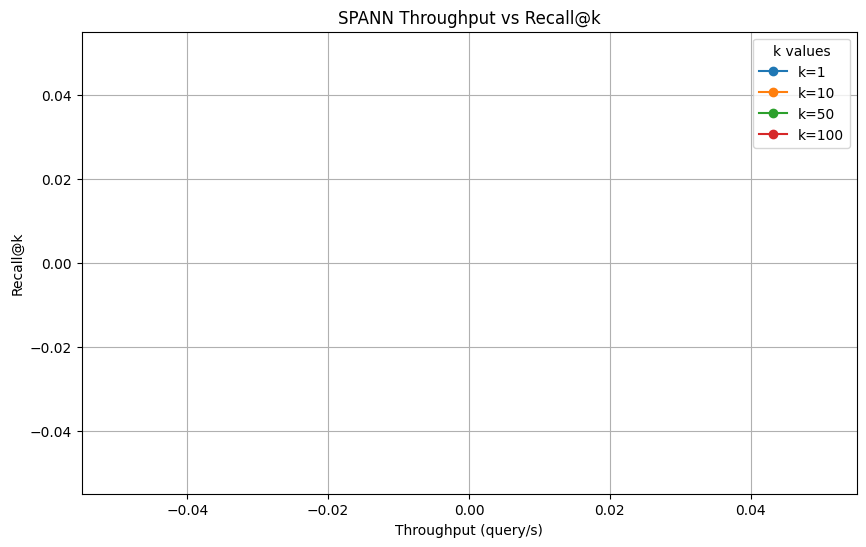

In [89]:
plt.figure(figsize=(10, 6))

for k in k_values:
    spann = df[df['index_type'] == 'spann']
    subset = spann[df['k'] == k]
    plt.plot(subset['throughput'], subset['recall2'], marker='o', label=f'k={k}')

plt.xlabel('Throughput (query/s)')
plt.ylabel('Recall@k')
plt.title('SPANN Throughput vs Recall@k')
plt.grid(True)
plt.legend(title='k values')
plt.show()

In [90]:
recalls = pd.DataFrame()
for k in k_values:
    subset = df[df['k'] == k]
    recalls[k] = subset['recall2'].mean()
recalls

,1,10,50,100


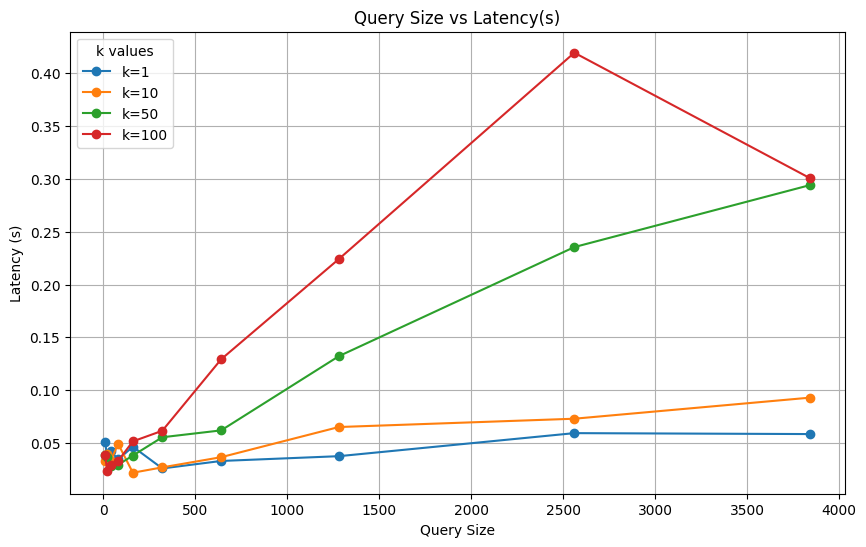

In [94]:
plt.figure(figsize=(10, 6))

for k in k_values:
    # spann = df[df['index_type'] == 'spann']
    subset = df[df['k'] == k]
    plt.plot(subset['query_size'], subset['latency_(s)'], marker='o', label=f'k={k}')

plt.xlabel('Query Size')
plt.ylabel('Latency (s)')
plt.title('Query Size vs Latency(s)')
plt.grid(True)
plt.legend(title='k values')
plt.show()